# voc-images-and-masks-to-patch

This notebook converts a single 2250x2250 px image and its segmentation mask to 81 patches of width `w=242` for training and testing machine learning models. 

Its use differs slightly between the data labeled with LabeMe versus Scale.

In [1]:
#see load_label_png.py also.
import os
import glob
import numpy as np
import PIL.Image

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#path = '/scratch/ssd/gallowaa/cciw/VOCdevkit/Train-all/'
path = '/scratch/ssd/gallowaa/cciw/VOCdevkit/Validation-v101-originals/'
label_path = os.path.join(path, 'SegmentationClass')
image_path = os.path.join(path, 'JPEGImages')

list_of_labels = os.listdir(label_path)
list_of_images = os.listdir(image_path)

print(len(list_of_labels))
print(len(list_of_images))

assert len(list_of_labels) == len(list_of_images)

55
55


## Set patch width `w`

In [10]:
w = 250 # in pixels. Results in 81 images for 2250x2250 (9x9)

# Save cropped masks

In [ ]:
for i in range(len(list_of_labels)):
    
    lab_file = os.path.join(
        label_path, list_of_labels[i].split('.')[0])
    lab = PIL.Image.open(lab_file + '.png')

    cnt = 0
    for row in range(lab.size[0] // w):
        for col in range(lab.size[0] // w):
            top = w * row
            bot = w * (row + 1)
            left  = w * col
            right = w * (col + 1)
            lab.crop(
                (left, top, right, bot)
            ).save(lab_file + '-' + str(cnt) + '.png')
            cnt += 1
    print(i, 'finished saving %d images' % cnt)

# Save cropped images

In [ ]:
for i in range(len(list_of_images)):
    
    img_file = os.path.join(
        image_path, list_of_images[i].split('.')[0])
    img = PIL.Image.open(img_file + '.jpg')

    cnt = 0
    for row in range(img.size[0] // w):
        for col in range(img.size[0] // w):
            top = w * row
            bot = w * (row + 1)
            left  = w * col
            right = w * (col + 1)
            img.crop(
                (left, top, right, bot)
            ).save(img_file + '-' + str(cnt) + '.jpg')
            cnt += 1
    print(i, 'finished saving %d images' % cnt)

# Visualization

In [32]:
list_of_images.sort()
list_of_labels.sort()
#list_of_images

In [33]:
i = 6
img_file = os.path.join(
        image_path, list_of_images[i].split('.')[0])
img = PIL.Image.open(img_file + '.jpg')
lab_file = os.path.join(
        label_path, list_of_labels[i].split('.')[0])
lab = PIL.Image.open(lab_file + '.png')

In [53]:
left = 0.02  # the left side of the subplots of the figure
right = 0.98   # the right side of the subplots of the figure
bottom = 0.02  # the bottom of the subplots of the figure
top = 0.98     # the top of the subplots of the figure
wspace = 0.05  # the amount of width reserved for space between subplots,
# expressed as a fraction of the average axis width
hspace = 0.05  # the amount of height reserved for space between subplots,
# expressed as a fraction of the average axis height

<IPython.core.display.Javascript object>


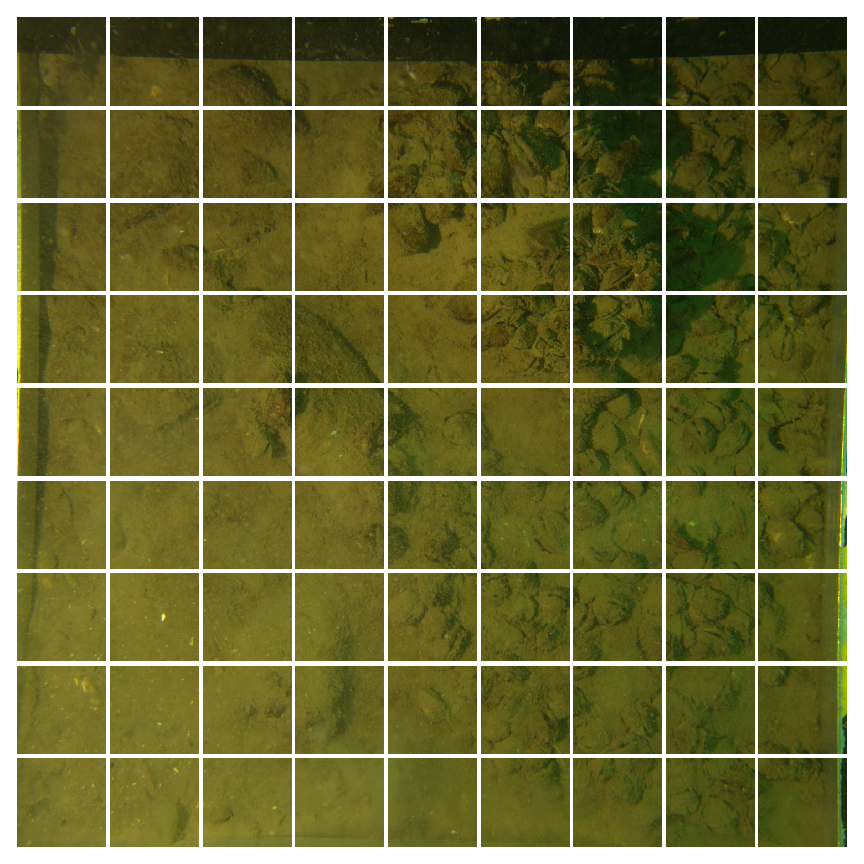

In [58]:
wvz = 250 # 340, 283, 242, 212
lbl = np.asarray(img)
n_plot = lbl.shape[0] // wvz
fig, axes = plt.subplots(n_plot, n_plot, figsize=(12, 12))

for row in range(lbl.shape[0] // wvz):
    for col in range(lbl.shape[0] // wvz):
        axes[row, col].imshow(lbl[row*wvz:(1+row)*wvz, col*wvz:(col+1)*wvz])
        axes[row, col].axis('off')
#plt.tight_layout()        
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
plt.show()
plt.savefig(img_file.split('/')[-1] + '_img_viz.jpg')
#plt.savefig(lab_file.split('/')[-1] + '_lab_viz.png')